In [3]:
from sklearn.feature_extraction import DictVectorizer
import csv
from sklearn import tree
from sklearn import preprocessing
from six import StringIO

# Read in the csv file and put features into list of dict and list of class label
allElectronicsData = open(r'./AllElectronics.csv', 'rb')
reader = csv.reader(allElectronicsData)
headers = reader.next()

print(headers)

featureList = []
labelList = []

for row in reader:
    labelList.append(row[len(row)-1])
    rowDict = {}
    for i in range(1, len(row)-1):
        rowDict[headers[i]] = row[i]
    featureList.append(rowDict)

print(featureList)

# Vetorize features
vec = DictVectorizer()
dummyX = vec.fit_transform(featureList) .toarray()

print("dummyX: " + str(dummyX))
print(vec.get_feature_names())

print("labelList: " + str(labelList))

# vectorize class labels
lb = preprocessing.LabelBinarizer()
dummyY = lb.fit_transform(labelList)
print("dummyY: " + str(dummyY))

# Using decision tree for classification
# clf = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(dummyX, dummyY)
print("clf: " + str(clf))


# Visualize model
with open("allElectronicInformationGainOri.dot", 'w') as f:
    f = tree.export_graphviz(clf, feature_names=vec.get_feature_names(), out_file=f)

oneRowX = dummyX[0, :]
print("oneRowX: " + str(oneRowX))

newRowX = oneRowX
newRowX[0] = 1
newRowX[2] = 0
print("newRowX: " + str(newRowX))

predictedY = clf.predict(newRowX)
print("predictedY: " + str(predictedY))




AttributeError: '_csv.reader' object has no attribute 'next'

# 说明
> 麦子学院决策数学习应用，上面为源码

In [52]:
import pandas as pd
from sklearn import tree

In [53]:
# 观察数据
# 添加header=None解决有列没有列名的问题
allElec = pd.read_csv('./AllElectronics.csv',header=None)
allElec.head(-1)
#添加列名
allElec.columns=["RID","age","income","student","credit_rating","class_buys_computer"]
allElec.head(-1)
#删除第一行
allElec = allElec.loc[1:]
allElec.head(-1)

,RID,age,income,student,credit_rating,class_buys_computer
1,1,youth,high,no,fair,no
2,2,youth,high,no,excellent,no
3,3,middle_aged,high,no,fair,yes
4,4,senior,medium,no,fair,yes
5,5,senior,low,yes,fair,yes
6,6,senior,low,yes,excellent,no
7,7,middle_aged,low,yes,excellent,yes
8,8,youth,medium,no,fair,no
9,9,youth,low,yes,fair,yes
10,10,senior,medium,yes,fair,yes


In [54]:
# 将字符串转换为数字，便于分类
allElec.loc[allElec["age"]=='youth','age']=0
allElec.loc[allElec["age"]=='middle_aged','age']=1
allElec.loc[allElec["age"]=='senior','age']=2

allElec.loc[allElec["income"]=='low','income']=0
allElec.loc[allElec["income"]=='medium','income']=1
allElec.loc[allElec["income"]=='high','income']=2

allElec.loc[allElec["student"]=='no','student'] = 0
allElec.loc[allElec["student"]=='yes','student'] = 1

allElec.loc[allElec["credit_rating"]=='fair','credit_rating'] = 0
allElec.loc[allElec["credit_rating"]=='excellent','credit_rating'] = 1

allElec.loc[allElec["class_buys_computer"]=='no','class_buys_computer'] = 0
allElec.loc[allElec["class_buys_computer"]=='yes','class_buys_computer'] = 1

allElec.head(-1)
#删除RID列
allElec.drop(['RID'],axis=1,inplace=True)
#删除行
#X.drop([2],axis=0,inplace=True)
print(allElec.dtypes)

age                    object
income                 object
student                object
credit_rating          object
class_buys_computer    object
dtype: object


In [55]:
# 开始用决策树算法训练模型
x_train = allElec.loc[:]
predictors = ["age","income","student","credit_rating"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train[predictors].values,x_train["class_buys_computer"].values.astype('int'))
#x_train.drop(axis=1,inplace=True)

[Text(148.8, 195.696, 'X[2] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(74.4, 152.208, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(37.2, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(74.4, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(148.8, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(186.0, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 152.208, 'X[0] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(186.0, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(260.40000000000003, 108.72, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

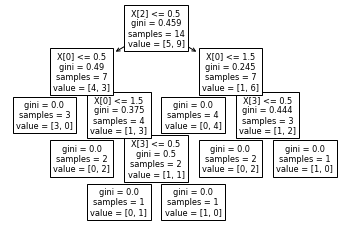

In [56]:
tree.plot_tree(clf)

In [65]:
y_true=clf.predict(x_train[predictors].values)

In [66]:
print(x_train["class_buys_computer"].values.astype('int'))
y_pred = x_train["class_buys_computer"].values.astype('int')

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [67]:
# 用原始数据作为输入，来计算模型的准确率为100%
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

1.0